In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import linregress
%matplotlib inline

df = pd.read_csv("adult.data.txt", header=None, sep=", ", engine='python')

df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"]
for i in df.columns:
    df[i] = df[i].map(lambda x: None if str(x).strip() == '?' else x)


below = df[df["salary"] == "<=50K"]
above = df[df["salary"] == ">50K"]

1.	Marketing wants to understand how education-num influences income.

Text(0.5, 1.0, 'Salary distribution by Education-num')

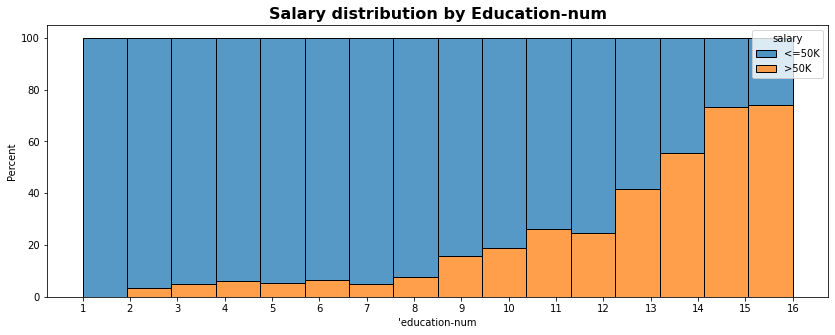

In [2]:
fig = plt.figure(figsize=(14,5))
plot = df.groupby(['education-num'])['salary'].value_counts(normalize=True).mul(100).reset_index(name='percent')
g = sns.histplot(x='education-num', hue='salary', weights='percent', multiple='stack', data=plot, bins=16)
g.set(ylabel="Percent", xlabel="'education-num")
g.set_xticks(np.arange(df['education-num'].min(), df['education-num'].max()+1, 1.0))
g.set_title("Salary distribution by Education-num", fontsize=16, fontweight='bold')

2.	Marketing wants to understand how age influences income.

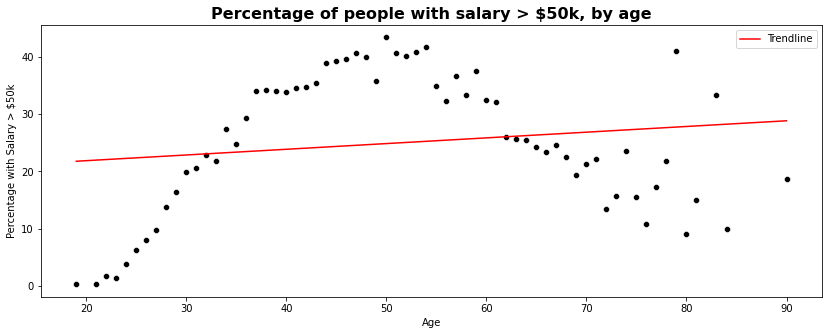

In [3]:
fig = plt.figure(figsize=(14,5))
plot = df.groupby(['age'])['salary'].value_counts(normalize=True).mul(100).reset_index(name='percent')
df_above_50k = plot[plot['salary'] == '>50K']
axs = sns.scatterplot(x='age', y='percent', data=df_above_50k, color='black')
axs.set(xlabel='Age', ylabel='Percentage with Salary > $50k')
axs.set_title("Percentage of people with salary > $50k, by age", fontsize=16, fontweight='bold')

slope, intercept, _, _, _ = linregress(df_above_50k['age'], df_above_50k['percent'])
trendline = slope * df_above_50k['age'] + intercept
plt.plot(df_above_50k['age'], trendline, color='red', label='Trendline')
plt.legend()
plt.show()


3.	Marketing wants to understand how marital status influences income.

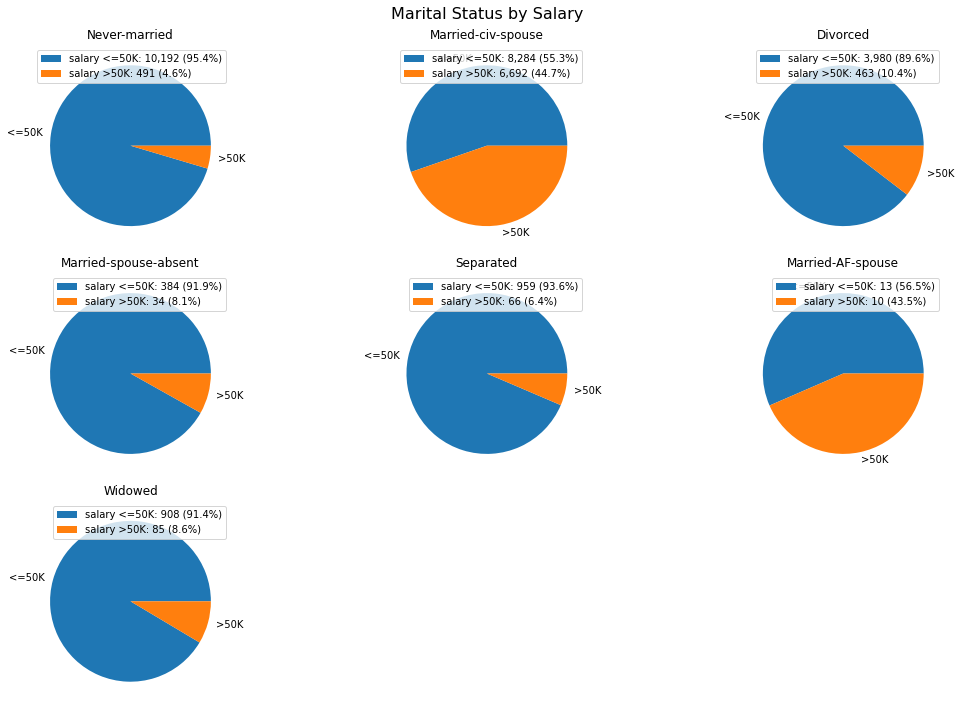

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, metric in enumerate(df["marital-status"].unique()):
    ax = axs[i // 3, i % 3]
    raw = df[df["marital-status"] == metric]
    filtered = raw.groupby('salary').size().sort_values(ascending=False)
    filtered.plot(kind='pie', autopct='', ax=ax, title=f'{metric}')
    labels = [f'salary {i}: {format(v, ",.0f")} ({round((v/filtered.sum())*100,1)}%)' for i,v in filtered.iteritems()]
    ax.legend(labels=labels, loc="best")
    ax.set_ylabel("")

plt.suptitle('Marital Status by Salary', fontsize=16)
axs[2, 2].set_visible(False)
axs[2, 1].set_visible(False)
plt.tight_layout()
plt.show()


4.	Marketing wants to understand how work class influences income.

Text(0, 0.5, 'Workclass')

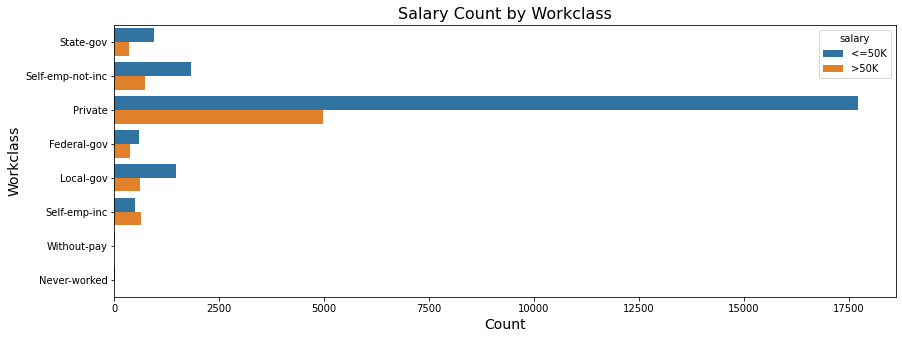

In [5]:
fig = plt.figure(figsize=(14,5))
sns.countplot(data=df, y='workclass', hue='salary')
plt.title('Salary Count by Workclass',fontsize=16)
plt.xlabel('Count',fontsize=14)
plt.ylabel('Workclass',fontsize=14)

5.	Marketing wants to understand how race and sex influences income.

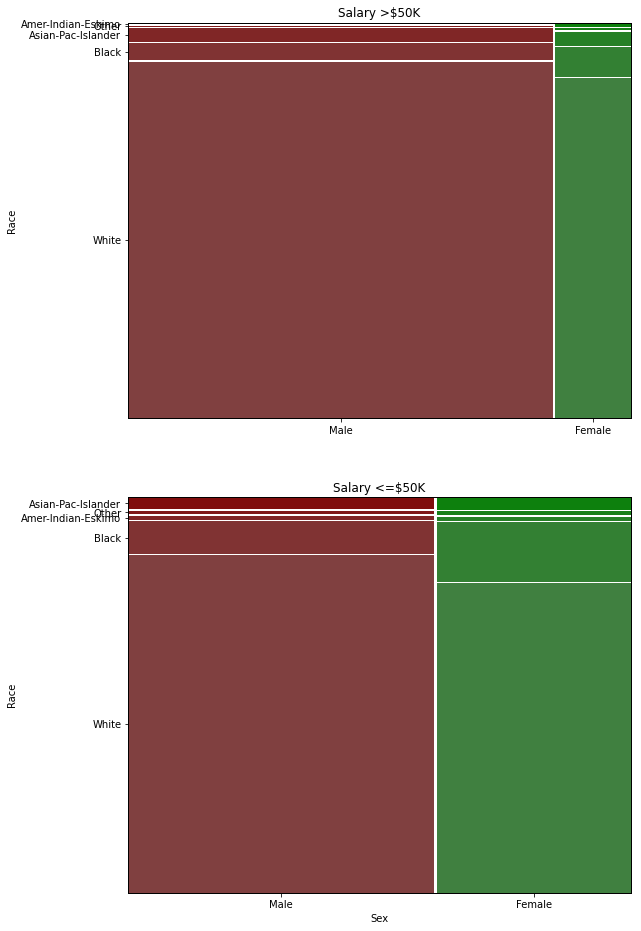

In [9]:
plt.figure(figsize=(9,16))
ax1 = plt.subplot(211)
axes_dict = mosaic(above, ['sex', 'race'], ax=ax1, labelizer=lambda k: '')
ax1.set_title('Salary >$50K')

ax2 = plt.subplot(212)
mosaic(below, ['sex', 'race'], ax=ax2, labelizer=lambda k: '')
ax2.set_title('Salary <=$50K')
ax1.set_ylabel('Race')
ax2.set_ylabel('Race')
ax2.set_xlabel('Sex')
plt.show()


6.	Marketing wants to understand how hours-per-week and native-country influence income.


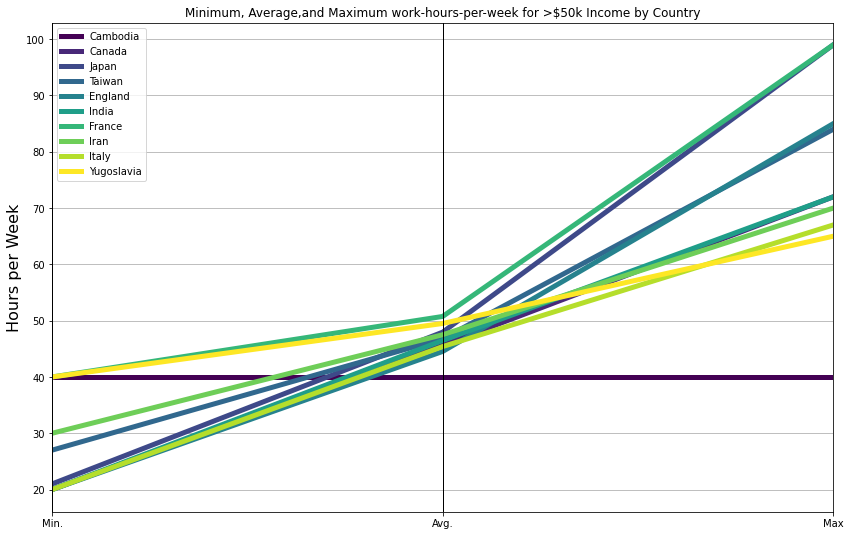

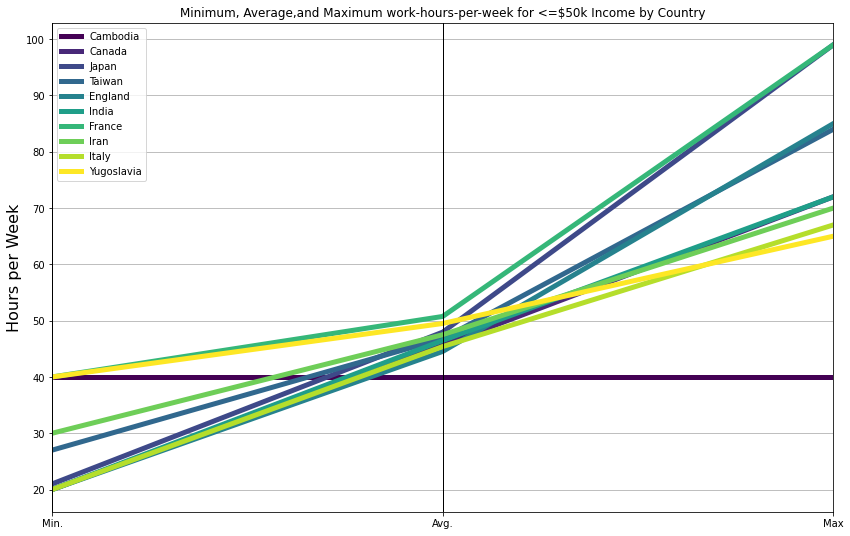

In [8]:
dataabove = []
databelow = []

percents_above = dict(above.value_counts("native-country") / (above.value_counts("native-country") + below.value_counts("native-country")))
mean = (above.value_counts("native-country") / (above.value_counts("native-country") + below.value_counts("native-country"))).describe()["75%"]
countries_with_high_percent_of_above = sorted({k:i for k,i in percents_above.items() if i > mean}, key=lambda x: x[1])

# countries = df_above_50k["native-country"].unique()
for country in countries_with_high_percent_of_above:

    min_attendance = min(above.loc[above['native-country'] == country]["hours-per-week"].values)
    max_attendance = max(above.loc[above['native-country'] == country]["hours-per-week"].values)
    avg_attendance = (sum(above.loc[above['native-country'] == country]["hours-per-week"].values) /  len(above.loc[above['native-country'] == country]["hours-per-week"].values))
    dataabove.append((country, min_attendance, avg_attendance, max_attendance))

    min_attendance = min(above.loc[above['native-country'] == country]["hours-per-week"].values)
    max_attendance = max(above.loc[above['native-country'] == country]["hours-per-week"].values)
    avg_attendance = (sum(above.loc[above['native-country'] == country]["hours-per-week"].values) /  len(above.loc[above['native-country'] == country]["hours-per-week"].values))
    databelow.append((country, min_attendance, avg_attendance, max_attendance))

plotdf = pd.DataFrame(dataabove, columns=["country", "Min.", "Avg.", "Max"])
fig, ax = plt.subplots(figsize=(14, 9))
pd.plotting.parallel_coordinates(plotdf, "country", linewidth=5, colormap="viridis")  
plt.title('Minimum, Average,and Maximum work-hours-per-week for >$50k Income by Country')
plt.ylabel("Hours per Week", fontsize=16)
plt.legend()
plt.show()

plotdf = pd.DataFrame(databelow, columns=["country", "Min.", "Avg.", "Max"])
fig, ax = plt.subplots(figsize=(14, 9))
pd.plotting.parallel_coordinates(plotdf, "country", linewidth=5, colormap="viridis")  
plt.title('Minimum, Average,and Maximum work-hours-per-week for <=$50k Income by Country')
plt.ylabel("Hours per Week", fontsize=16)
plt.legend()
plt.show()


In [15]:
import tabula as tb
import pandas as pd
import re

file = 'N:\\Standards\\Analyst Resources\\RPAPythonUpdates\\03-31-2020 FHLB Pledged Collateral (old).pdf'
data = tb.read_pdf(file, pages='all', multiple_tables=True, lattice=True, pandas_options={'header': None})

pd.concat([data[2], data[3]])

In [21]:
pd.concat([data[2], data[3]])

,0,1,2,3,4,5,6,7,8
0,Pledged Collateral Details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eligible Collateral - Pledged,Last Updated,Book Value ($),Market Value ($),Adjustment ($),Adjustment (%),Valuation (%),Discounted Value ($),NaN
2,Commercial Real Estate Loans (CRE) /\rCRE - 1s...,03/10/2020,"44,392,162.72","44,350,471.06",0.00,100.00,65.000,"28,827,806.06",NaN
3,Commercial Real Estate Loans (CRE) /\rCRE Part...,01/22/2020,"8,881,885.00","8,881,885.00",0.00,100.00,65.000,"5,773,225.25",NaN
4,Commercial Real Estate Loans (CRE) /\rCRE Part...,01/22/2020,"7,641,451.10","7,496,655.65",0.00,100.00,65.000,"4,872,826.17",NaN
5,1-4 Family Investment Loans /\rConventional - ...,03/10/2020,"16,753,743.68","16,656,603.87",0.00,98.00,68.230,"11,137,504.81",NaN
6,1-4 Family Investment Loans / Lower\rFICO Scor...,03/10/2020,"184,557.58","180,825.05",0.00,98.00,68.230,"120,909.41",NaN
7,1-4 Family Primary Residence Loans /\rConventi...,03/10/2020,"166,169,725.10","164,976,685.59",0.00,98.00,71.630,"115,809,343.93",NaN
8,1-4 Family Primary Residence Loans /\rNon-Trad...,03/10/2020,"1,294,166.27","1,275,586.31",0.00,98.00,70.250,"878,177.39",NaN
9,1-4 Family Primary Residence Loans /\rLower FI...,03/10/2020,"13,904,075.30","13,588,976.11",0.00,98.00,58.100,"7,737,291.23",NaN
